# HSE 2023: Введение в машинное обучение БИ 22/23

## ДЗ 1

### Внимание!
* Если в задании просят объяснить что-либо, то это значит, что требуется **письменный ответ**, который **является** частью задания и оценивается
* **Не** загружайте датасет (titanic.csv) в тестирующую систему (он у нас и так есть)
* Мы **только** принимаем **ipynb** ноутбуки. Если вы используете Google Colab, то вам необходимо скачать ноутбук перед сдачей ДЗ
* **Не** используйте циклы python вместо векторных операций NumPy над векторами NumPy - это сильно влияет на производительность (можете почитать почему https://blog.paperspace.com/numpy-optimization-vectorization-and-broadcasting/), наказывается -0.25 за **каждое** задание. Циклы разрешены только в части 1 (Задания 1 - 4).
* Некоторые задания содержат тесты. Они тестируют ваше решение только для простых случаев. Таким образом, прохождение теста, **не** гарантирует полной оценки за задание.

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Python (2 балла)

**Задание 1** (0.5 балла)<br/>
Даны ненулевые числа `a`,  `r` и `N`. Найдите произведение первых `N` членов геометрической прогрессии с первым членом `a` и множителем `r` без использования формулы для произведения первых `N` членов

In [ ]:
def find_product(a,r,N):
    progression = np.geomspace(start = a, stop = a*r**(N-1), num=N)
    return np.prod(progression)

def find_product_nonumpy(a, r, N): #на всякий случай, если нельзя использовать np
    product = 1
    for step in range(N):
      product = product*(a*r**step)
    return product

a = 2
r = 3
N = 3
print(find_product(a,r,N))
#print(find_product_nonumpy(a,r,N))

216.0


**Задание 2** (0.5 балла) <br/>
Дано целое число `N`. Проверьте является ли оно палиндромом. Это значит, что число читается одинаково слева направо и справа налево.

In [ ]:
#Будем переводить строку, чтобы было проще обращаться с нулями
a = 1000
str(a)[::-1]

'0001'

In [ ]:
def check_palindrome(N):
    reverse = str(N)[::-1] #переворачиваем число
    str_n = str(N)
    for digit in range(int(len(str_n)/2)):
      if reverse[digit] != str_n[digit]:
        return False
    return True

for N in [3, 81, 111, 113, 810, 2022, 4774, 51315, 611816]:
    print(N, check_palindrome(N))

3 True
81 False
111 True
113 False
810 False
2022 False
4774 True
51315 True
611816 False


**Задание 3** (0.5 балла) <br/>
Найдите первые `N` палиндромов для чисел, начинающихся от 1000 (вы можете использовать функцию из предыдущего задания).

In [ ]:
def find_palindromes(N):
  answer = []
  number = 1000
  while len(answer) < N:
    if number % 10 > 0: #дополнительная проверка для ускорения функции
      if check_palindrome(number):
        answer.append(number)
    number += 1
  return answer

print(find_palindromes(5))
print(find_palindromes(10))
print(find_palindromes(20))

[1001, 1111, 1221, 1331, 1441]
[1001, 1111, 1221, 1331, 1441, 1551, 1661, 1771, 1881, 1991]
[1001, 1111, 1221, 1331, 1441, 1551, 1661, 1771, 1881, 1991, 2002, 2112, 2222, 2332, 2442, 2552, 2662, 2772, 2882, 2992]


**Задание 4** (0.5 балла) <br/>
Даны числа: `a`, `b`, `c`. Без использования функций `min`, `max` и других, найдите минимальное.

In [ ]:
from random import randint

def find_min(a, b, c):
    if a <= b: #b точно не минимальное
      return a if a <= c else c #находим минимальное между a и с
    else: #a точно не минимальное
      return b if b <= c else c #находим минимальное между b и с

for i in range(10):
    a = randint(-100, 100)
    b = randint(-100, 100)
    c = randint(-100, 100)

    print(a, b, c, '\tMinimum:', find_min(a, b, c))

-95 26 -18 	Minimum: -95
-63 16 -4 	Minimum: -63
18 90 53 	Minimum: 18
65 -48 -76 	Minimum: -76
-11 -92 55 	Minimum: -92
53 -50 -69 	Minimum: -69
-21 86 60 	Minimum: -21
70 -27 -16 	Minimum: -27
-73 -16 93 	Minimum: -73
34 -19 62 	Minimum: -19


# 2. Numpy (4 балла)

**Задание 1** (0.5 балла) <br/>
Создайте случайный numpy вектор (`np.random.rand()`) длины 17 и с суммой элементов равной 6.

In [ ]:
#вот таким образом получаем сумму равную 1, и чтобы получить 6, будем домножать ее на 6
array = np.random.rand(17)
print(sum(array/np.sum(array)))

1.0


In [ ]:
array = np.random.rand(17)
my_array = 6*(array/np.sum(array))
print(f'Length: {len(my_array)}')
print(f'Sum of elements: {np.sum(my_array)}')

Length: 17
Sum of elements: 6.0


**Задание 2** (0.5 балла) <br/>
Создайте два случайных вектора $a$ и $b$ одинаковой длины.

Расчитайте следующие расстояния между векторами **без использования специальных функций. Вы можете использовать только базовые операции numpy  (`np.linalg.*` и другие высокоуровневые методы и пакеты запрещены).**:

* Manhattan
$$ d(a, b) = \sum_i |a_i - b_i| $$
* Euclidean
$$ d(a, b) = \sqrt{\sum_i (a_i - b_i)^2} $$
* Chebyshev
$$ d(a, b) = \underset{i}{max} |a_i - b_i| $$
* Cosine
$$ d(a, b) = 1 - \frac{a^\top b}{||a||_2\cdot||b||_2} $$


In [ ]:
n = np.random.randint(1, 50, size = 1)[0] #любое целое число от 1 до 50
vec1 = np.random.rand(n)
vec2 = np.random.rand(n)

In [ ]:
def calculate_manhattan(a, b):
    return sum(np.absolute(a - b))

def calculate_euclidean(a, b):
    return np.sqrt(sum((a - b)**2))

def calculate_chebyshev(a, b):
    return np.absolute(a - b).max()

def calculate_cosine(a, b):
    return 1 - np.dot(a, b)/(np.sqrt(np.square(a).sum())*np.sqrt(np.square(b).sum()))

In [ ]:
a = vec1
b = vec2
print(f'Manhattan distance: {calculate_manhattan(a, b)}')
print(f'Euclidean distance: {calculate_euclidean(a, b)}')
print(f'Chebyshev distance: {calculate_chebyshev(a, b)}')
print(f'Cosine distance: {calculate_cosine(a, b)}')

Manhattan distance: 17.19765742242589
Euclidean distance: 2.9931237130129156
Chebyshev distance: 0.9023051223565877
Cosine distance: 0.26092323199882694


Тесты (самопроверка)

In [ ]:
from scipy.spatial import distance

assert round(calculate_manhattan(a, b), 5) == round(distance.cityblock(a, b), 5), \
    f"manhattan got {calculate_manhattan(a, b)}, need {distance.cityblock(a, b)}"

assert round(calculate_euclidean(a, b), 5) == round(distance.euclidean(a, b), 5), \
    f"euclidean got {calculate_euclidean(a, b)}, need {distance.euclidean(a, b)}"

assert round(calculate_chebyshev(a, b), 5) == round(distance.chebyshev(a, b), 5), \
    f"chebyshev got {calculate_chebyshev(a, b)}, need {distance.chebyshev(a, b)}"

assert round(calculate_cosine(a, b), 5) == round(distance.cosine(a, b), 5), \
    f"cosine got {calculate_cosine(a, b)}, need {distance.cosine(a, b)}"

**Задание 3** (0.5 балла) <br/>
Создайте случайный вектор (`np.random.randint()`) длины 76. Трансформируйте вектор так, чтобы после преобразования он имел следующие свойства
* Максимальный элемент -1
* Минимальный элемент -4
* Оставшиеся значения в интервале (-4; -1) без изменения относительного порядка ([1, 2, 4] -> [0.1, 0.2, 0.4] - порядок сохранен)

In [ ]:
def transform(array):
  array = -1*array #разворачиваем относительный порядок (было 1, 10 - стало -10, -1), потому что потом он будет меняться при нормализации
  arr = (array - np.min(array))/(np.max(array) - np.min(array))
  #теперь все значения от 0 до 1, где 0 - минимальное, 1 - максимальное
  #значит, для изначальных чисел у нас 0 - максимальное, 1 - минимальное

  arr = -3*arr - 1 #чтобы все числа красиво лежали между -4 и -1
  #бывшее 0 стало -1, бывшее 1 стало -4, красиво =)
  return(arr)

In [ ]:
array = np.random.randint(1, 100, size=76)
my_array = transform(array)
print(f'Min: {np.min(my_array)}')
print(f'Max: {np.max(my_array)}')
print('Array:')
print(my_array)

Min: -4.0
Max: -1.0
Array:
[-1.24489796 -1.91836735 -2.13265306 -1.48979592 -1.         -2.04081633
 -1.91836735 -2.95918367 -3.02040816 -3.87755102 -1.73469388 -2.95918367
 -2.34693878 -2.56122449 -1.48979592 -1.73469388 -2.62244898 -2.68367347
 -1.58163265 -3.51020408 -1.12244898 -2.5        -3.35714286 -1.09183673
 -2.07142857 -3.63265306 -3.57142857 -1.36734694 -1.06122449 -3.1122449
 -3.81632653 -1.97959184 -3.60204082 -1.91836735 -1.09183673 -2.86734694
 -2.04081633 -2.04081633 -2.56122449 -3.84693878 -3.93877551 -3.84693878
 -2.13265306 -3.1122449  -3.78571429 -2.7755102  -3.78571429 -3.47959184
 -2.2244898  -2.86734694 -3.96938776 -1.94897959 -3.3877551  -3.08163265
 -1.45918367 -2.2244898  -2.28571429 -3.84693878 -1.15306122 -1.94897959
 -2.19387755 -2.16326531 -3.78571429 -3.44897959 -3.44897959 -1.2755102
 -2.5        -4.         -1.64285714 -2.46938776 -1.36734694 -3.63265306
 -1.70408163 -3.26530612 -1.12244898 -1.45918367]


Визуальный тест (самопроверка)

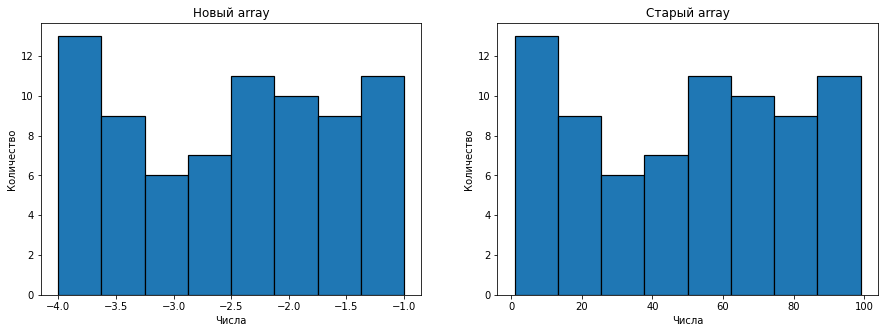

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.hist(transform(array), bins='auto', edgecolor='black', linewidth=1.2)
plt.title("Новый array")
plt.xlabel('Числа')
plt.ylabel('Количество')

plt.subplot(1, 2, 2) # index 2
plt.hist(array, bins='auto', edgecolor='black', linewidth=1.2)
plt.title("Старый array")
plt.xlabel('Числа')
plt.ylabel('Количество')

plt.show()

**Задание 4** (0.5 балла) <br/>
Создайте матрицу размерности $8 \times 5$ с целыми числами из промежутка [-7, 43]. Выведите колонку, которая содержит максимальный элемент матрицы.

In [ ]:
my_array = np.random.randint(-7, 43, size=(8, 5))
over_max = my_array.max(axis=0) #массив с максимальными элементами из каждой колонки
index_max = np.where(over_max == over_max.max())[0][0] #index колонки с максимальным элементом
selected_column = my_array[:,index_max]

print('Shape: ', my_array.shape)
print('Array:')
print(my_array)
print(f'Selected column: {selected_column}')

Shape:  (8, 5)
Array:
[[32  0  4 32  3]
 [36 33 21 42  4]
 [ 8  8  8 13 27]
 [39 -2  4 37 -2]
 [16 10 -3 19 34]
 [27 31 32 30 15]
 [35 -4 39 23 32]
 [40 -3 32 -3 11]]
Selected column: [32 42 13 37 19 30 23 -3]


**Задание 5** (0.5 балла) <br/>

Замените все пропущенные значения на медиану.

In [ ]:
arr = np.random.rand(10)
idx = np.random.randint(0, 10, 4)
arr[idx] = np.nan

print('Array:')
print(arr)

Array:
[       nan 0.90598076        nan        nan 0.97580478 0.89973832
 0.25930055 0.63489082 0.93789234 0.23571546]


In [ ]:
def replace_missing(arr):
  return np.nan_to_num(arr, nan=np.median(arr[arr == arr])) #считаем медиану, не охватывая NaN значения, иначе медиана просто NaN

In [ ]:
arr = replace_missing(arr)
print('Array with no missing values:')
print(arr)

Array with no missing values:
[0.89973832 0.90598076 0.89973832 0.89973832 0.97580478 0.89973832
 0.25930055 0.63489082 0.93789234 0.23571546]


**Задание 6** (0.5 балла) <br/>
Создайте функцию, которая принимает на вход картинку ```X``` (3D вектор размерности (n, m, 3)) и возвращает среднее по всем 3 каналам (вектор размерности 3).

In [ ]:
def mean_channel(X):
    print(X)
    return X.mean(axis=(0, 1))

In [ ]:
n = 3
m = 3
X =  np.random.randint(-11, 8, size=(n, m, 3))
print(f'Vector of means: {mean_channel(X)}')

[[[  6  -8   5]
  [  1   2  -7]
  [  7  -3  -8]]

 [[-11   2   1]
  [ -4  -1  -9]
  [  0   0  -1]]

 [[  5   2  -1]
  [  3   4   5]
  [  2  -8  -2]]]
Vector of means: [ 1.         -1.11111111 -1.88888889]


**Задание 7** (1 балл) <br/>
Создайте функцию, которая принимает 3D вектор ```X``` на вход и возвращает все уникальные слои по 1 оси.

Пример входных данных:

     ([[[1, 2, 3],
        [1, 2, 3],
        [1, 2, 3]],

       [[4, 5, 6],
        [4, 5, 7]
        [4, 5, 6]],

       [[7, 8, 9],
        [7, 8, 9]
        [7, 8, 9]]])
        
Пример выходных:

     ([[[1, 2, 3],
        [1, 2, 3]],

       [[4, 5, 6],
        [4, 5, 7]],

       [[7, 8, 9],
        [7, 8, 9]]])

In [ ]:
def get_unique_rows(X):
    return np.unique(X, axis=1)

In [ ]:
X =  np.random.randint(4, 6, size=(n, 3, 3))
print('Matrix:')
print(X)
print('Unique rows:')
print(get_unique_rows(X)) #на моих рандомных числах не работает, но на тесте работает (см. ниже)

Matrix:
[[[4 5 4]
  [4 5 5]
  [4 4 4]]

 [[5 5 5]
  [4 5 5]
  [4 5 4]]

 [[5 5 5]
  [4 5 4]
  [5 4 5]]]
Unique rows:
[[[4 4 4]
  [4 5 4]
  [4 5 5]]

 [[4 5 4]
  [5 5 5]
  [4 5 5]]

 [[5 4 5]
  [5 5 5]
  [4 5 4]]]


Самопроверка

In [ ]:
test_matrix = np.array(([[[1, 2, 3],
    [1, 2, 3],
    [1, 2, 3]],

   [[4, 5, 6],
    [4, 5, 7],
    [4, 5, 6]],

   [[7, 8, 9],
    [7, 8, 9],
    [7, 8, 9]]]))

print(get_unique_rows(test_matrix))

[[[1 2 3]
  [1 2 3]]

 [[4 5 6]
  [4 5 7]]

 [[7 8 9]
  [7 8 9]]]


# 3. Pandas & Visualization (4 балла)


Вам предстоит работа с датасетом *Titanic*, который содержит информацию о пассажирах Титаника:
- **Survived** - 1 - выжил, 0 - умер (0); **Целевая переменная**
- **pclass** - класс пассажира;
- **sex** - пол пассажира
- **Age** - возраст пассажира в годах
- **sibsp**    - есть ли на борту братья и сестры   
- **parch**    - есть ли на борту родители или дети
- **ticket** - номер билета    
- **fare** - цена билета    
- **cabin** - номер каюты
- **embarked** - порт посадки; C = Cherbourg, Q = Queenstown, S = Southampton

**Заметка** Для всех визуализаций используйте  matplotlib или seaborn, но НЕ plotly! Графики Plotly иногда исчезают после сохранения. В этом случае задание оценено не будет.

**Заметка** все ваши ответы должны быть поддержаны необходимым кодом, вычислениями, визуализацией и объяснениями. Ответы без кода и объяснений оцениваться не будут.

**Задание 0** (0 баллов) \
Загрузите датасет и выведите первые 5 строк

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv", sep=",")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Задание 1** (1 балл) <br/>
Ответьте на следующие вопросы:
    
    * Есть ли в датасете пропущенные значения? В каких колонках?
    * Какой процент пассажирова выжил? Сбалансированы ли классы пассажиров?
    * Кого больше, мужчин или женщин?
    * Какой наименее популярный порт посадки?
    * Сколько классов пассажиров (pclass) было на титанике?
    * Какова средняя цена билета? И средняя цена в зависимости от класса пассажира?
Пожалуйста, указывайте не только ответ, но и код, с помощью которого вы его получили.

Есть ли в датасете пропущенные значения? В каких колонках?

In [ ]:
df.isnull().sum() #да, есть. В колонках Age и Cabin

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Какой процент пассажирова выжил? Сбалансированы ли классы пассажиров?

In [ ]:
#умерло чуть более 61%, выжило чуть более 38%
round(df.Survived.value_counts(normalize=True)*100, 1)

0    61.6
1    38.4
Name: Survived, dtype: float64

In [ ]:
#нет, классы не сбалансированны, видно, что в классе 3 умерло более 75% процентов пассажиров, тогда как в классе 1 - менее 40%
round(df.groupby(['Pclass']).Survived.value_counts(normalize=True)*100, 1)

Pclass  Survived
1       1           63.0
        0           37.0
2       0           52.7
        1           47.3
3       0           75.8
        1           24.2
Name: Survived, dtype: float64

Кого больше, мужчин или женщин?

In [ ]:
#мужчин почти в 2 раза больше, чем женщин (64.8% против 35.2%)
round(df.Sex.value_counts(normalize=True)*100, 1)

male      64.8
female    35.2
Name: Sex, dtype: float64

Какой наименее популярный порт посадки?

In [ ]:
#Q - наименее популярный порт посадки
df.Embarked.value_counts().sort_values()

Q     77
C    168
S    644
Name: Embarked, dtype: int64

Сколько классов пассажиров (pclass) было на титанике?

In [ ]:
#всего 3 класса, 491 в 3 классе, 216 во 2 классе и 184 в 1 классе
df.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

Какова средняя цена билета? И средняя цена в зависимости от класса пассажира?

In [ ]:
#средняя цена билетов в принципе
df['Fare'].mean()

32.204207968574636

In [ ]:
#средняя цена билетов по классам
df.groupby(['Pclass'])['Fare'].mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

**Задание 2** (0.5 балла) <br/>
Визуализируйте распределение возраста (вы можете использовать гистограммы, к примеру).

    * Какие максимальный и минимальный возраста пассажиров? Визуализируйте их на графике
    * Какой среддний возраст? Также по мужчинам и женщинам в отдельности? Визуализируйте на графике
    * Сделайте выводы по графику, который у вас получился

Визуализируйте распределение возраста (вы можете использовать гистограммы, к примеру).

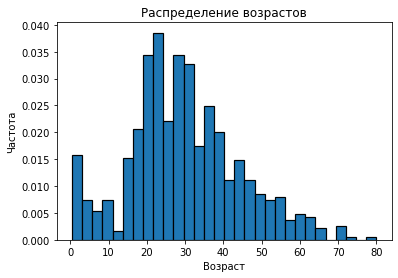

In [ ]:
plt.hist(df.Age, edgecolor='black', linewidth=1.2, bins=30, density=True)
plt.title('Распределение возрастов')
plt.xlabel('Возраст')
plt.ylabel('Частота');

Какие максимальный и минимальный возраста пассажиров? Визуализируйте их на графике

In [ ]:
print('Минимальный возраст:', df.dropna(subset=['Age']).Age.sort_values().iloc[0])
print('Максимальный возраст:', df.dropna(subset=['Age']).Age.sort_values(ascending=False).iloc[0])

Минимальный возраст: 0.42
Максимальный возраст: 80.0


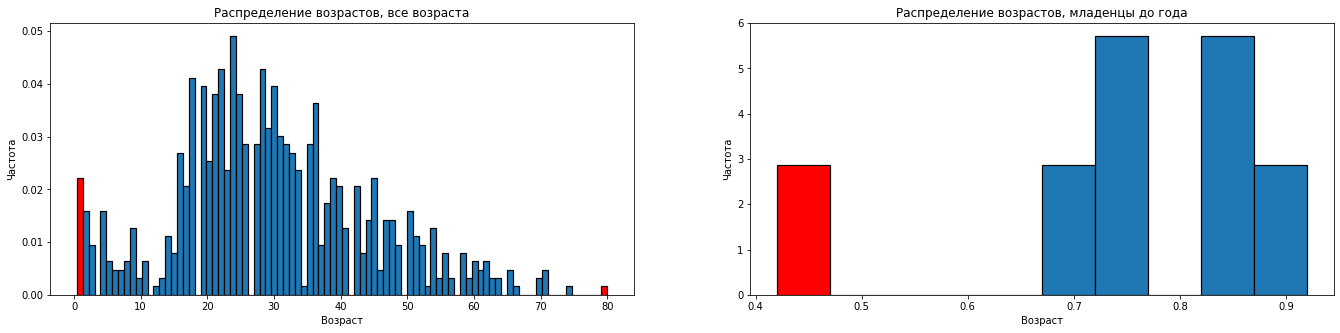

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(23,5))
N, bins, patches = axes[0].hist(df.Age, edgecolor='black', linewidth=1.2, bins=90, density=True)
N1, bins1, patches1 = axes[1].hist(df[df.Age < 1].Age, edgecolor='black', linewidth=1.2, density=True)

patches[0].set_facecolor('red')
patches[-1].set_facecolor('red')
patches1[0].set_facecolor('red')


axes[0].set_title('Распределение возрастов, все возраста')
axes[1].set_title('Распределение возрастов, младенцы до года')
axes[0].set_xlabel('Возраст')
axes[1].set_xlabel('Возраст')
axes[0].set_ylabel('Частота')
axes[1].set_ylabel('Частота');

Какой среддний возраст? Также по мужчинам и женщинам в отдельности? Визуализируйте на графике

In [ ]:
print('Средний возраст для женщин', df[df.Sex=='female'].Age.mean())
print('Средний возраст для мужчин', df[df.Sex=='male'].Age.mean())
print('Средний возраст для всех', df.Age.mean())

Средний возраст для женщин 27.915708812260537
Средний возраст для мужчин 30.72664459161148
Средний возраст для всех 29.69911764705882


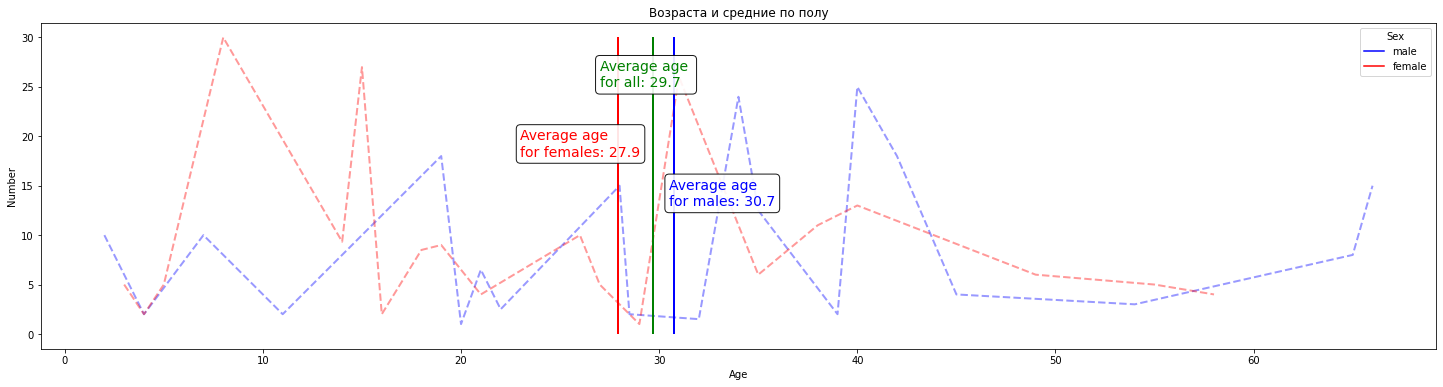

In [ ]:
fig, ax = plt.subplots(figsize=(25, 6))
ax1 = sns.lineplot(data=df, x="Age", y=df.Age.value_counts(), hue='Sex',
                palette=['b', 'r'], ci=None, alpha=0.4, linewidth=2, linestyle="dashed").set(ylabel='Number', title='Возраста и средние по полу')


ax.vlines(x=df[df.Sex=='female'].Age.mean(), ymin=0, ymax=30, linewidth=2, color='r')
ax.vlines(x=df.Age.mean(), ymin=0, ymax=30, linewidth=2, color='g')
ax.vlines(x=df[df.Sex=='male'].Age.mean(), ymin=0, ymax=30, linewidth=2, color='b')

ax.text(23, 18, f'Average age \nfor females: {round(df[df.Sex=="female"].Age.mean(), 1)}', size=14, color='red', bbox=dict(boxstyle='round', facecolor='white', alpha=0.9))
ax.text(30.5, 13, f'Average age \nfor males: {round(df[df.Sex=="male"].Age.mean(), 1)}', size=14, color='blue', bbox=dict(boxstyle='round', facecolor='white', alpha=0.9));
ax.text(27, 25,  f'Average age \nfor all: {round(df.Age.mean(), 1)}', size=14, color='green', bbox=dict(boxstyle='round', facecolor='white', alpha=0.9));

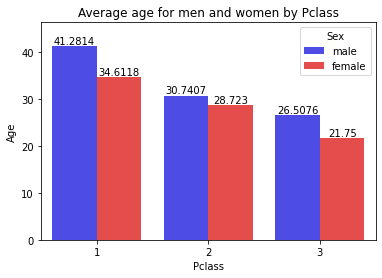

In [ ]:
#Интересное наблюдение, что в 1 классе люди старше, а в 3 - самые младшие (в среднем)
#Также возрастное неравенство в плане гендера больше всего наблюдается в 1 классе и меньше всего во 2 классе
ax = sns.barplot(x = "Pclass", y = "Age", hue="Sex", palette = ['b', 'r'], alpha = 0.8, data = df, errwidth=0)
for i in ax.containers:
    ax.bar_label(i,)
ax.set_title("Average age for men and women by Pclass");

In [ ]:
print('квартили 0.1 и 0.95 для мужчин', df[df.Sex=='male'].Age.quantile(0.1), df[df.Sex=='male'].Age.quantile(0.95))
print('квартили 0.1 и 0.95 для женщин', df[df.Sex=='female'].Age.quantile(0.1), df[df.Sex=='female'].Age.quantile(0.95))

квартили 0.1 и 0.95 для мужчин 16.0 59.0
квартили 0.1 и 0.95 для женщин 9.0 53.0


 Сделайте выводы по графику, который у вас получился

In [ ]:
'''
Как мы видим, в возрасте до 15 лет абсолютное большинство - представители женского пола
После где-то 25 лет большинство - представители мужского пола
При этом нет женщин старше 60 лет, хотя мужчин старше 60 лет достаточно много (более 25).

В целом средние не особо отличаются (27.9 против 30.7), если посмотреть на медиану и квартили,
то различие не больше 3 лет. Но если посмотреть квантили в районе 10% и 95%, то тут отличие уже 7 лет и 6 лет

Общий вывод: для пассажиров старше 15 лет и младше 50 лет отличие по количеству в разрезе пола не сильное.
Среди пассажиров младше 15 лет больше женщин.
Среди пассажиров старше 50 лет больше мужчин.
'''

**Задание 3** (1 балла) <br/>
Найдите все титулы пассажиров (например, *Capt., Mr.,Mme.*), которые записаны в колонке Name, и ответьте на следующие вопросы:

    * Сколько всего уникальных титулов?
    * Сколько всего пассажиров по каждому титулу??
    * Какой наиболее популярный титул у мужчин? У женщин?
    
**Подсказка** Вы можете извлечь титул из имени, так как это слово, которое содержит точку.

In [ ]:
df.Name.head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

Верное решение

In [ ]:
import re
df1 = df.copy()
df1['title'] = df.Name.str.extract(r'(\w*\.)')
df1['title'].unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Don.', 'Rev.', 'Dr.', 'Mme.',
       'Ms.', 'Major.', 'Lady.', 'Sir.', 'Mlle.', 'Col.', 'Capt.',
       'Countess.', 'Jonkheer.'], dtype=object)

Не очень верное решение, которое не дает вытащить Countess

In [ ]:
wrong = df.Name.apply(lambda x: pd.Series(x.split(", ")[1].split()[0]))
wrong[0].unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Don.', 'Rev.', 'Dr.', 'Mme.',
       'Ms.', 'Major.', 'Lady.', 'Sir.', 'Mlle.', 'Col.', 'Capt.', 'the',
       'Jonkheer.'], dtype=object)

In [ ]:
wrong[wrong[0]=='the'] #смотрим, что за человек со званием the и видим, что такой всего 1

,0
759,the


In [ ]:
df.iloc[759].Name

'Rothes, the Countess. of (Lucy Noel Martha Dyer-Edwards)'

**Сколько всего уникальных титулов?**

In [ ]:
len(df1['title'].unique())

17

**Сколько всего пассажиров по каждому титулу?**

In [ ]:
df1['title'].value_counts()

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Mlle.          2
Major.         2
Col.           2
Countess.      1
Capt.          1
Ms.            1
Sir.           1
Lady.          1
Mme.           1
Don.           1
Jonkheer.      1
Name: title, dtype: int64

**Какой наиболее популярный титул у мужчин? У женщин?**

In [ ]:
df1.groupby(['title', 'Sex'])['PassengerId'].count().sort_values(ascending=False)
#cамый популярный титул в целом - Mr
#самый популярный у мужчин - Mr
#самый популярный у женщин - Miss.

title      Sex   
Mr.        male      517
Miss.      female    182
Mrs.       female    125
Master.    male       40
Rev.       male        6
Dr.        male        6
Mlle.      female      2
Major.     male        2
Col.       male        2
Ms.        female      1
Mme.       female      1
Capt.      male        1
Lady.      female      1
Jonkheer.  male        1
Dr.        female      1
Don.       male        1
Countess.  female      1
Sir.       male        1
Name: PassengerId, dtype: int64

**Задание 4** (0.5 балла) <br/>
Присутствует ли корреляция между *pclass* и *ticket price*? Посчитайте среднюю цену для каждого класса и визуализируйте распределение цен по каждому классу. Сделайие выводы по графику

Подсказка: вы можете сделать разные типы графиков, такие как box, violine, pair, histogram. Обоснуйте выбор графиков и сделайте значимые выводы



Присутствует ли корреляция между pclass и ticket price?

In [ ]:
df.corr() #как мы видим, корреляция -0.55 - "заметная" (можно условно считать 1, 2 и 3 класс порядковыми числительными)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


Распределение

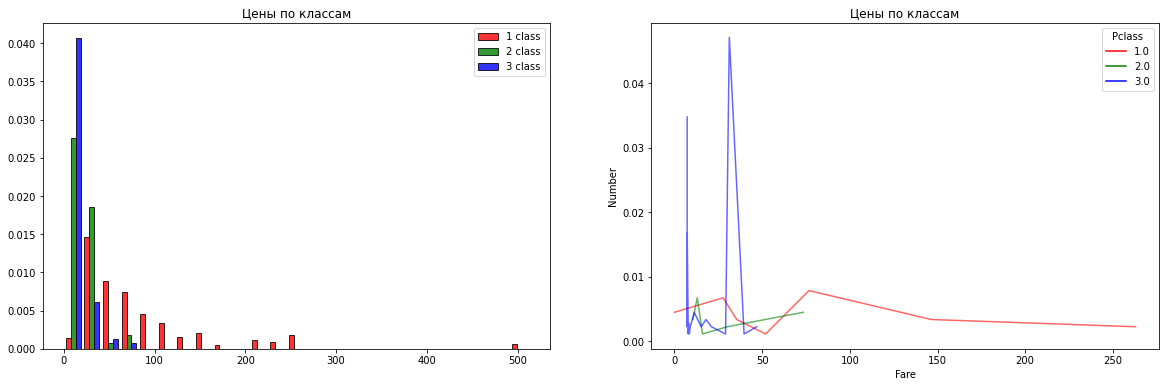

In [ ]:
#в целом, видно, что у 2 и 3 класса не сильно отличаются цены, тогда как у 1 класса самые дорогие билеты => скорее всего корреляция есть, 100%
#при этом более где-то 75% цен 3 класса - меньше 50
fig, ax = plt.subplots(1, 2, figsize=(20, 6))
plt.subplot(1, 2, 1)
plt.hist([df[(df.Pclass==1)].Fare, df[(df.Pclass==2)].Fare, df[(df.Pclass==3)].Fare],
        density = True, edgecolor='black', color=['r', 'g', 'b'],
        label=['1 class', '2 class', '3 class'], bins=25, alpha=0.8)
plt.legend(loc='upper right')
plt.title('Цены по классам')

plt.subplot(1, 2, 2)
sns.lineplot(data=df, y=df.Fare.value_counts(normalize=True),x='Fare', hue='Pclass', palette = ['r', 'g', 'b'],
                ci=None, alpha=0.6).set(ylabel='Number', title='Цены по классам');

Посчитаем среднее

In [ ]:
df.groupby(['Pclass'])['Fare'].mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

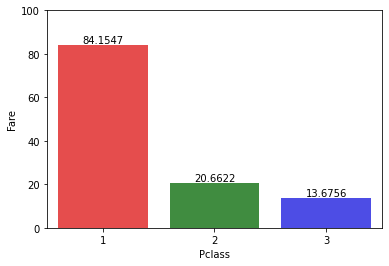

In [ ]:
ax = sns.barplot(x = "Pclass", y = "Fare", data = df, palette = ['r', 'g', 'b'], alpha = 0.8, errwidth=0)
ax.bar_label(ax.containers[0]);

In [ ]:
plt.hist([df[(df.Pclass==1)].Fare, df[(df.Pclass==2)].Fare, df[(df.Pclass==3)].Fare],
        density = True, edgecolor='black', color=['r', 'g', 'b'],
        label=['1 class', '2 class', '3 class'], bins=25, alpha=0.8)
plt.legend(loc='upper right')
plt.title('Цены по классам')

In [ ]:
df1 = df.copy()
df1['Embarked']

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


**Задание 5** (0.5 балла) <br/>
Такие же вопросы, как и в задании 4, но про корреляцию между *embarked* и *ticket priсe*.

Среднее

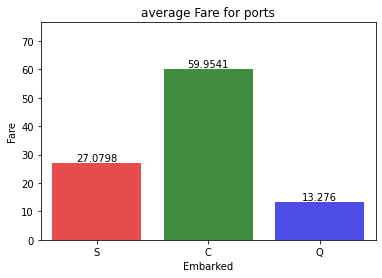

In [ ]:
#как мы видим, выглядит так, что С - самый дорогой порт, Q - самый дешевый
ax = sns.barplot(x = "Embarked", y = "Fare", data = df, palette = ['r', 'g', 'b'], alpha = 0.8, errwidth=0)
ax.bar_label(ax.containers[0])
ax.set_title("Average Fare for ports");

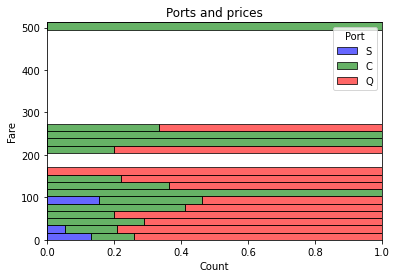

In [ ]:
#Диграмма может показаться странной, но мне нравится, что тут видно, что нет цен выше 300 нигде кроме порта С.
#При этом все в порте S закупались по ценам ниже 100, а большинство вообще по минимальной цене
#Несмотря на то, что посетители порта С самые богатые, они тоже закупались по минимальным ценам
#Посетители порта Q не покупали билетов меньше 300, но при этом у них наибольший разборс цен от минимальной до 300.
#Если бы не люди, которые купили билет за 500, то порт Q мог бы считаться таким же элитным, как и порт C

ax = sns.histplot(data=df, y="Fare", hue="Embarked", multiple='fill',
             bins=30, palette=['r', 'g', 'b'], alpha=0.6).set(title="Ports and prices")
plt.legend(loc='upper right', labels=['S', 'C', 'Q'], title='Port'); #иначе легенда почему-то была слева и закрывала синих =(

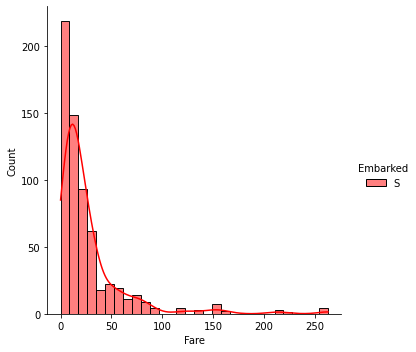

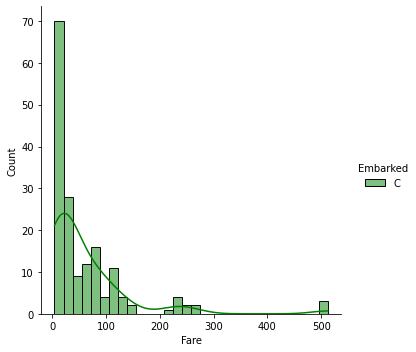

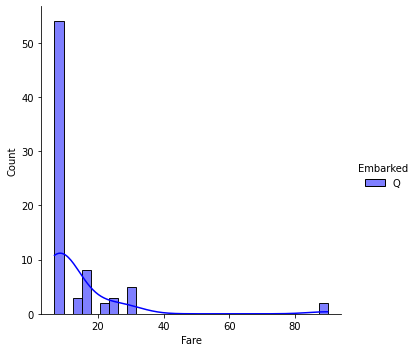

In [ ]:
#Если нарисовать каждое распределение отдельно, то видно, что во всех портах большинство людей брали билеты подешевле
sns.displot(data=df[(df.Embarked=='S')], x='Fare', kde=True, bins=30, hue='Embarked', palette=['r'])
sns.displot(data=df[(df.Embarked=='C')], x='Fare', kde=True, bins=30, hue='Embarked', palette=['g'])
sns.displot(data=df[(df.Embarked=='Q')], x='Fare', kde=True, bins=30, hue='Embarked', palette=['b'])

**Задание 6** (0.5 балла) <br/>
Визуализируйте распределение возарста для выживших и погибших пассажиров по отдельности, посчитайте средний возраст по выжившим и погибшим. Отличаются ли они? Постройте визуализацию для мужчин и женщин по отдельности. Сделайте выводы о том, что вы видите на графиках

Визуализируйте распределение возарста для выживших и погибших пассажиров по отдельности, посчитайте средний возраст по выжившим и погибшим.

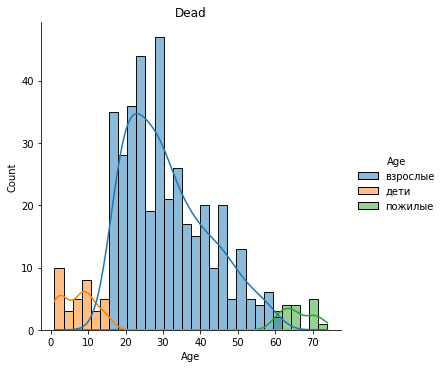

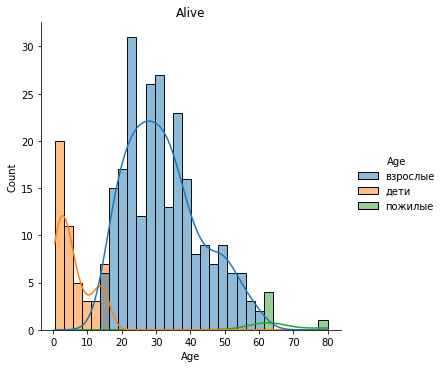

In [ ]:
hue_color = df.Age.apply(lambda x: 'дети' if x < 16 else ('пожилые' if x > 60 else 'взрослые'))
sns.displot(data=df[df.Survived==0], x='Age', kde=True, bins=30, hue=hue_color).set(title='Dead')
sns.displot(data=df[df.Survived==1], x='Age', kde=True, bins=30, hue=hue_color).set(title='Alive')
plt.show()

In [ ]:
"""
Как мы видим, детей (до 16 лет) хорошо пытались спасать, а взрослых где-то после 60 лет вообще почти не спасали, на них будто забили.
Лучше всего спаслись младенчики (2/3 выжили)
"""

In [ ]:

from scipy.stats import beta
import numpy as np
from calc_prob import calc_prob_between

#This is the known data: impressions and conversions for the Control and Test set
imps_ctrl,convs_ctrl=6076, 621
imps_test, convs_test=6076, 745

#here we create the Beta functions for the two sets
a_C, b_C = convs_ctrl+1, imps_ctrl-convs_ctrl+1
beta_C = beta(a_C, b_C)
a_T, b_T = convs_test+1, imps_test-convs_test+1
beta_T = beta(a_T, b_T)

#calculating the lift
lift=(beta_T.mean()-beta_C.mean())/beta_C.mean()

#calculating the probability for Test to be better than Control
prob=calc_prob_between(beta_T, beta_C)

print (f"Test option lift Conversion Rates by {lift*100:2.2f}% with {prob*100:2.1f}% probability.")

ModuleNotFoundError: ignored